In [1]:
# Necessary imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data
data = pd.read_excel("C:/Users/srian/Documents/GitHub/Generative-AI-project/Centrifugal_pumps_measurements.xlsx")

data

,Machine_ID,value_ISO,value_DEMO,value_ACC,value_P2P,valueTEMP,minute,second,year,month,day,hour,Pump_Status
0,1,0.349609,0.000343,0.012512,0.042480,24.25,33,41,2022,12,7,12,Healthy
1,1,0.349609,0.000343,0.012512,0.042480,24.25,33,46,2022,12,7,12,Healthy
2,1,0.349609,0.000343,0.012512,0.042480,24.25,33,51,2022,12,7,12,Healthy
3,1,0.349609,0.000343,0.012512,0.042480,24.25,33,56,2022,12,7,12,Healthy
4,1,0.349609,0.000343,0.012512,0.042480,24.25,34,1,2022,12,7,12,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,2,0.023193,0.000277,0.000637,0.006409,23.00,11,47,2022,12,14,15,Not Healthy
5110,2,0.023193,0.000277,0.000637,0.006409,23.00,11,52,2022,12,14,15,Not Healthy
5111,2,0.023193,0.000277,0.000637,0.006409,23.00,11,57,2022,12,14,15,Not Healthy
5112,2,0.023193,0.000277,0.000637,0.006409,23.00,12,2,2022,12,14,15,Not Healthy


In [3]:
# Checking for missing values
data.isnull().sum()

Machine_ID     0
value_ISO      0
value_DEMO     0
value_ACC      0
value_P2P      0
valueTEMP      0
minute         0
second         0
year           0
month          0
day            0
hour           0
Pump_Status    0
dtype: int64

In [4]:
# # Combine date and time components to create a single datetime column
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour', 'minute', 'second']])
data.set_index('datetime', inplace=True)

In [5]:
# Drop unnecessary columns
data = data.drop(['year', 'month', 'day', 'hour', 'minute', 'second'], axis=1)

In [6]:
# Encode the 'Pump_Status' column
data['Pump_Status'] = data['Pump_Status'].apply(lambda x: 1 if x == 'Healthy' else 0)

In [7]:
data

,Machine_ID,value_ISO,value_DEMO,value_ACC,value_P2P,valueTEMP,Pump_Status
datetime,,,,,,,
2022-12-07 12:33:41,1,0.349609,0.000343,0.012512,0.042480,24.25,1
2022-12-07 12:33:46,1,0.349609,0.000343,0.012512,0.042480,24.25,1
2022-12-07 12:33:51,1,0.349609,0.000343,0.012512,0.042480,24.25,1
2022-12-07 12:33:56,1,0.349609,0.000343,0.012512,0.042480,24.25,1
2022-12-07 12:34:01,1,0.349609,0.000343,0.012512,0.042480,24.25,1
...,...,...,...,...,...,...,...
2022-12-14 15:11:47,2,0.023193,0.000277,0.000637,0.006409,23.00,0
2022-12-14 15:11:52,2,0.023193,0.000277,0.000637,0.006409,23.00,0
2022-12-14 15:11:57,2,0.023193,0.000277,0.000637,0.006409,23.00,0


Exploratory Data Analysis (EDA)

    1. Visualize Feature Trends

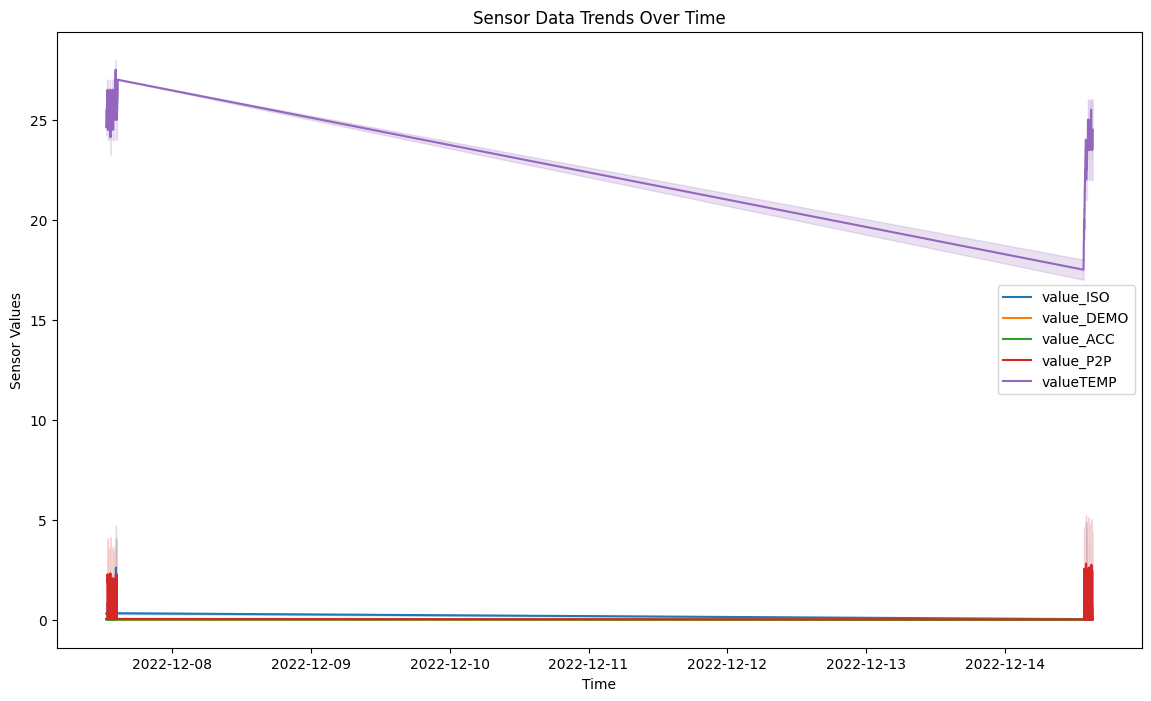

In [8]:
plt.figure(figsize=(14, 8))
for col in ['value_ISO', 'value_DEMO', 'value_ACC', 'value_P2P', 'valueTEMP']:
    sns.lineplot(data=data, x=data.index, y=col, label=col)
plt.title('Sensor Data Trends Over Time')
plt.xlabel('Time')
plt.ylabel('Sensor Values')
plt.legend()
plt.show()

    2. Correlation Heatmap

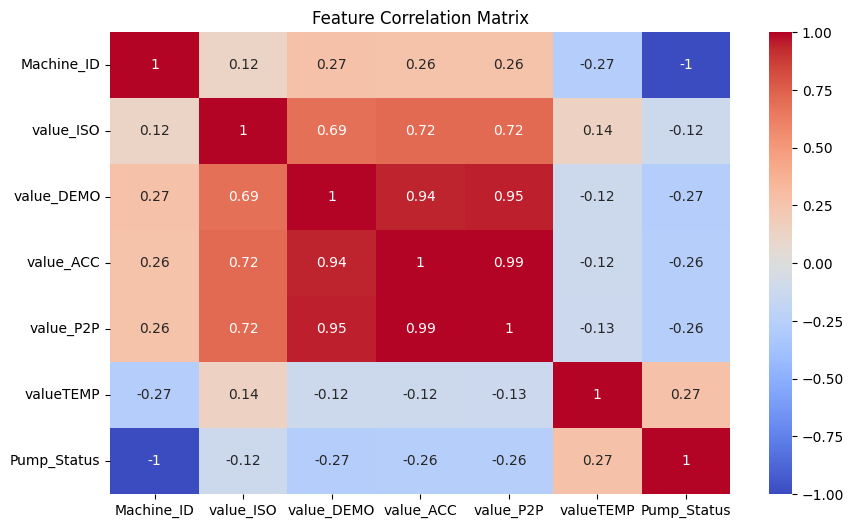

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### Correlation cleaning

    1. Removing Highly Correlated Features

In [10]:
# Compute correlation matrix
corr_matrix = data.corr().abs()

# Find features that are highly correlated (above 0.9)
high_corr_var = set()
threshold = 0.9

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > threshold:
            colname = corr_matrix.columns[i]
            high_corr_var.add(colname)

# Drop highly correlated features
data_reduced = data.drop(columns=high_corr_var)

print("Dropped Highly Correlated Features:", high_corr_var)

Dropped Highly Correlated Features: {'value_ACC', 'value_P2P', 'Pump_Status'}


Step 3: Feature Engineering

    1. Create Lag Features
        - Generate lag features to capture temporal dependencies.

In [11]:
for col in ['value_ISO', 'value_DEMO', 'value_ACC', 'value_P2P', 'valueTEMP']:
    data[f'{col}_lag1'] = data[col].shift(1)
    data[f'{col}_lag2'] = data[col].shift(2)

    2. Drop NaN values created by shifts

In [12]:
data.dropna(inplace=True)

    3. Scale the Features

In [13]:
features = data.drop('Pump_Status', axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

In [14]:
data_scaled

array([[-1.00039131,  0.15884141, -0.32314823, ..., -0.32222632,
        -0.17266608, -0.17280282],
       [-1.00039131,  0.15884141, -0.32314823, ..., -0.32222632,
        -0.17266608, -0.17280282],
       [-1.00039131,  0.15884141, -0.32314823, ..., -0.32222632,
        -0.17266608, -0.17280282],
       ...,
       [ 0.99960884, -0.79191213, -0.32412001, ..., -0.35520021,
        -0.81662101, -0.81679788],
       [ 0.99960884, -0.79191213, -0.32412001, ..., -0.35520021,
        -0.81662101, -0.81679788],
       [ 0.99960884, -0.79191213, -0.32412001, ..., -0.35520021,
        -0.81662101, -0.81679788]])

Step 4: Build an Autoencoder for Anomaly Detection

In [15]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the Autoencoder
input_dim = data_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the Autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1332
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6477
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6284
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6109
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6280
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5963
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6299
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5836
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6031
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5721
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5953
Epoch 12/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5924
Epoch 13/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6267
Epoch 14/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5886
Epoch 15/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0

Step 5: Anomaly Detection

    1. Calculate Reconstruction Error

In [16]:
reconstruction = autoencoder.predict(data_scaled)
reconstruction_error = np.mean(np.abs(data_scaled - reconstruction), axis=1)
anomaly_threshold = np.percentile(reconstruction_error, 95)
data['Anomaly_Score'] = reconstruction_error
data['Anomaly'] = data['Anomaly_Score'] > anomaly_threshold

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


    2. Visualize Anomalies

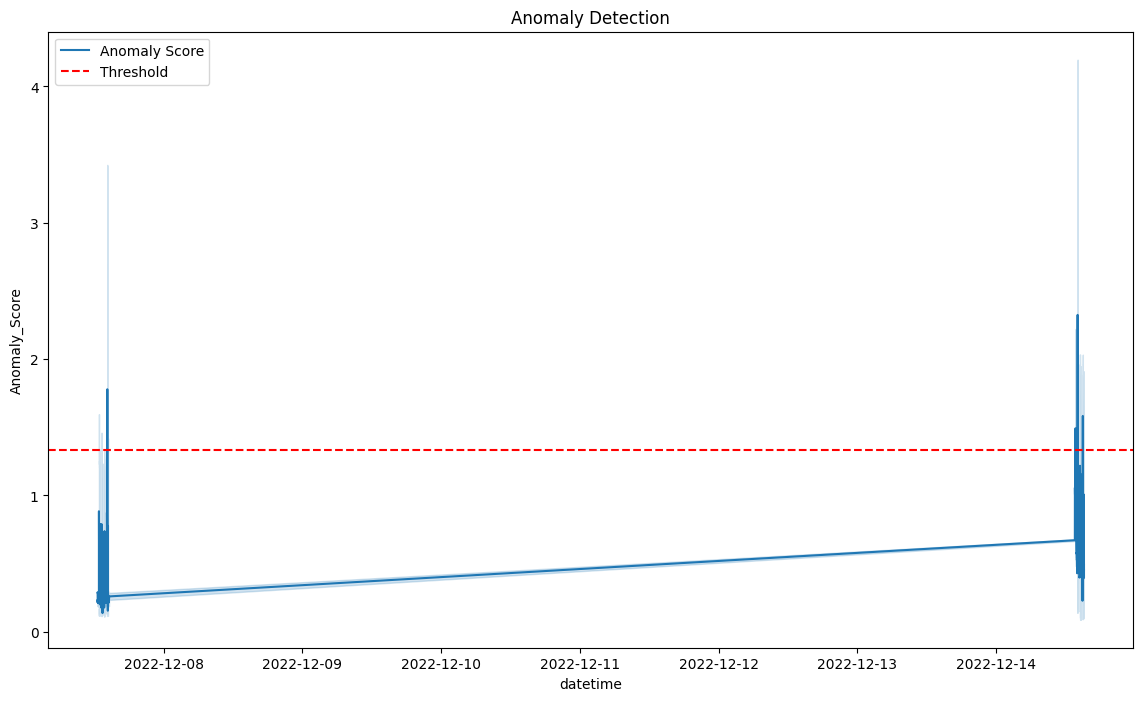

In [17]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=data, x=data.index, y='Anomaly_Score', label='Anomaly Score')
plt.axhline(y=anomaly_threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.title('Anomaly Detection')
plt.show()

Step 6: Predictive Maintenance Model (e.g., XGBoost for RUL Prediction)

    1. Split Data for Training and Testing

In [18]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X = data.drop(['Pump_Status', 'Anomaly_Score', 'Anomaly'], axis=1)
y = data['Pump_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)

    2. Evaluate Model Performance

In [19]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00       542

    accuracy                           1.00      1023
   macro avg       1.00      1.00      1.00      1023
weighted avg       1.00      1.00      1.00      1023

Accuracy: 1.0


-----------

### Checking the outcomes 

In [20]:
from sklearn.metrics import accuracy_score, roc_curve, auc

# Get predictions for both train and test sets
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Compare accuracies
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# If train accuracy is much higher than test accuracy, model is overfitting
if train_accuracy - test_accuracy > 0.1:
    print("Warning: Model may be overfitting!")

Training Accuracy: 1.0000
Test Accuracy: 1.0000


plotting ROC curve

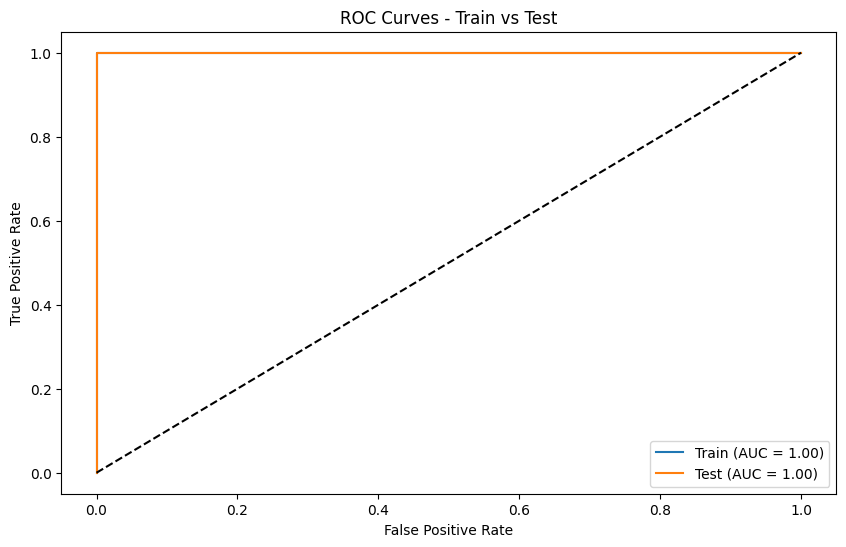

In [21]:
# Get prediction probabilities
train_probs = model.predict_proba(X_train)[:, 1]
test_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)
train_auc = auc(train_fpr, train_tpr)
test_auc = auc(test_fpr, test_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(train_fpr, train_tpr, label=f'Train (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Train vs Test')
plt.legend()
plt.show()

Seeing the predicted outcomes along with timestamps


Prediction Results:
                     Actual  Predicted  Probability
datetime                                           
2022-12-07 12:33:41       0          0     0.000461
2022-12-07 12:33:56       0          0     0.000461
2022-12-07 12:34:21       0          0     0.000461
2022-12-07 12:34:26       0          0     0.000461
2022-12-07 12:34:31       1          1     0.999525
2022-12-07 12:34:46       0          0     0.000461
2022-12-07 12:34:51       0          0     0.000461
2022-12-07 12:34:51       1          1     0.999525
2022-12-07 12:35:16       1          1     0.999525
2022-12-07 12:35:26       1          1     0.999525


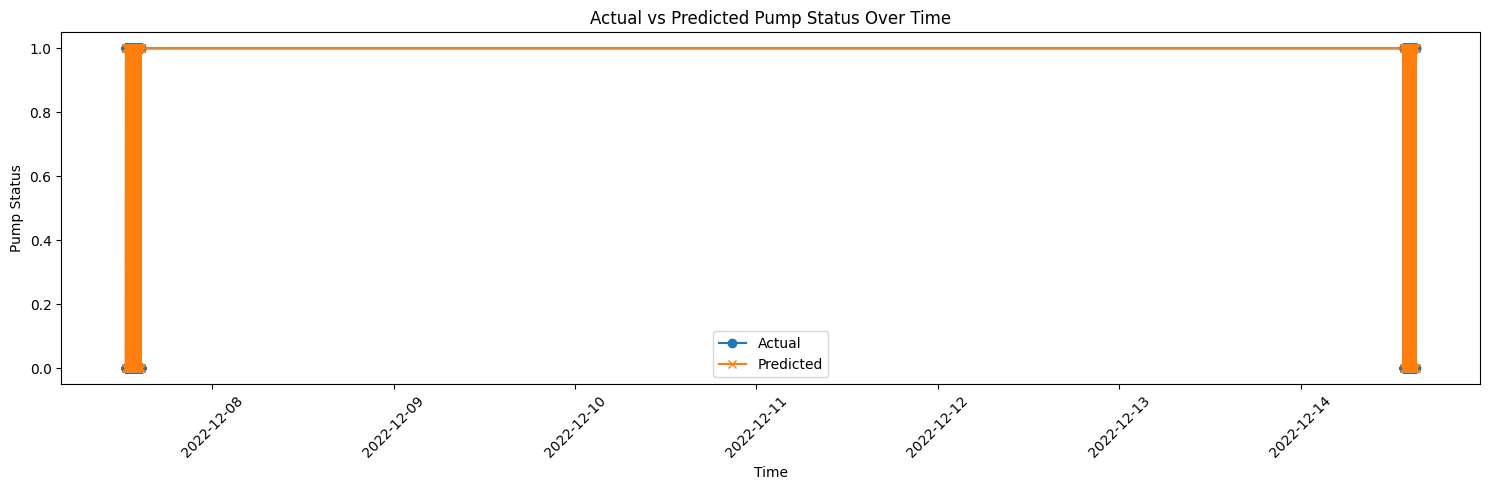

In [22]:
# Create DataFrame with predictions
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions,
    'Probability': model.predict_proba(X_test)[:, 1]
}, index=X_test.index)

# Sort by timestamp
predictions_df = predictions_df.sort_index()

# Display first few predictions
print("\nPrediction Results:")
print(predictions_df.head(10))

# Plot actual vs predicted
plt.figure(figsize=(15, 5))
plt.plot(predictions_df.index, predictions_df['Actual'], label='Actual', marker='o')
plt.plot(predictions_df.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Pump Status Over Time')
plt.xlabel('Time')
plt.ylabel('Pump Status')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
# Modify XGBoost with regularization parameters
model_regularized = xgb.XGBClassifier(
    max_depth=3,              # Reduce tree depth
    min_child_weight=3,       # Increase minimum child weight
    gamma=0.1,                # Increase minimum loss reduction
    reg_alpha=0.1,            # L1 regularization
    reg_lambda=1,             # L2 regularization
    subsample=0.8,            # Use 80% of data per tree
    colsample_bytree=0.8      # Use 80% of features per tree
)

# Retrain with regularized model
model_regularized.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)